In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('winequality-red.csv')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
from sklearn.model_selection import train_test_split
y=df['quality']
x=df.drop(['quality'],axis=1)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("Decision Tree : \n"+ classification_report(y_test,y_predict))
print("confusion matrix : \n", confusion_matrix(y_test,y_predict))

Decision Tree : 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.46      0.50      0.48       130
           6       0.44      0.43      0.44       132
           7       0.12      0.10      0.11        42
           8       0.00      0.00      0.00         5

    accuracy                           0.39       320
   macro avg       0.17      0.17      0.17       320
weighted avg       0.39      0.39      0.39       320

confusion matrix : 
 [[ 0  0  0  1  0  0]
 [ 0  0  4  6  0  0]
 [ 1  2 65 44 17  1]
 [ 3  6 55 57 11  0]
 [ 0  4 15 19  4  0]
 [ 0  0  1  2  2  0]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_train = train_test_split(x,y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("winequality-red.csv")

# Check the number of unique labels and samples
num_labels = data['quality'].nunique()
num_samples = len(data)

# If the number of labels is greater than the number of samples, reduce the number of unique labels
if num_labels > num_samples:
    # Remove duplicate labels
    data = data.drop_duplicates(subset='quality')

# Split features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.5625


In [ ]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

In [ ]:
numBaseClassifiers = 500
maxdepths = 10
trainAcc = []
testAcc = []

In [ ]:
clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.659375


In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print("Bagging Accuracy:", bagging_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.659375


In [ ]:
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)
boosting_accuracy = accuracy_score(y_test, boosting_pred)
print("Boosting Accuracy:", boosting_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosting Accuracy: 0.528125


Error: trainAcc is empty or has a different length than methods.


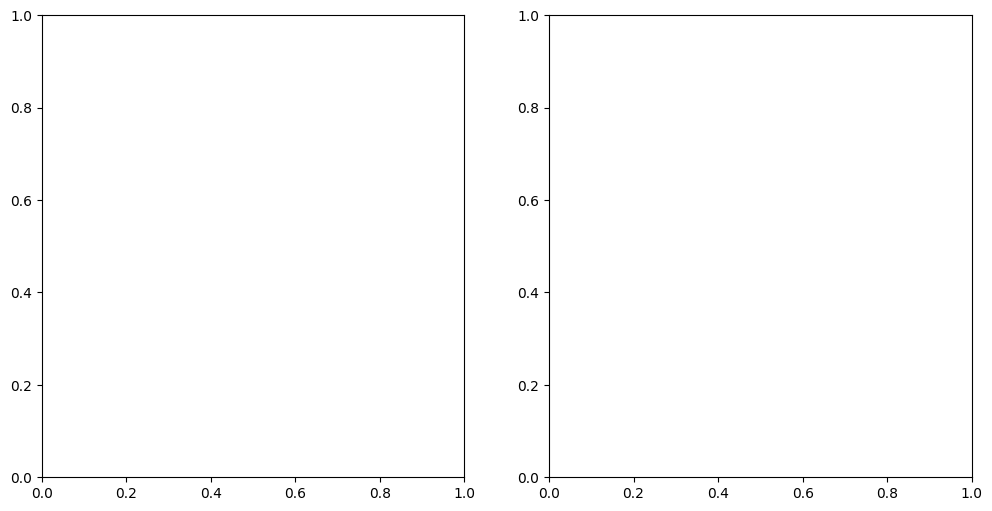

In [ ]:
import matplotlib.pyplot as plt

methods = ['Random Forest', 'Bagging', 'Ada Boost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Check if trainAcc is not empty and has the correct length
if not trainAcc or len(trainAcc) != len(methods):
    print("Error: trainAcc is empty or has a different length than methods.")
else:
    # Plot training accuracies
    ax1.bar([1.5, 2.5, 3.5], trainAcc)
    ax1.set_xticks([1.5, 2.5, 3.5])
    ax1.set_xticklabels(methods)

plt.show()

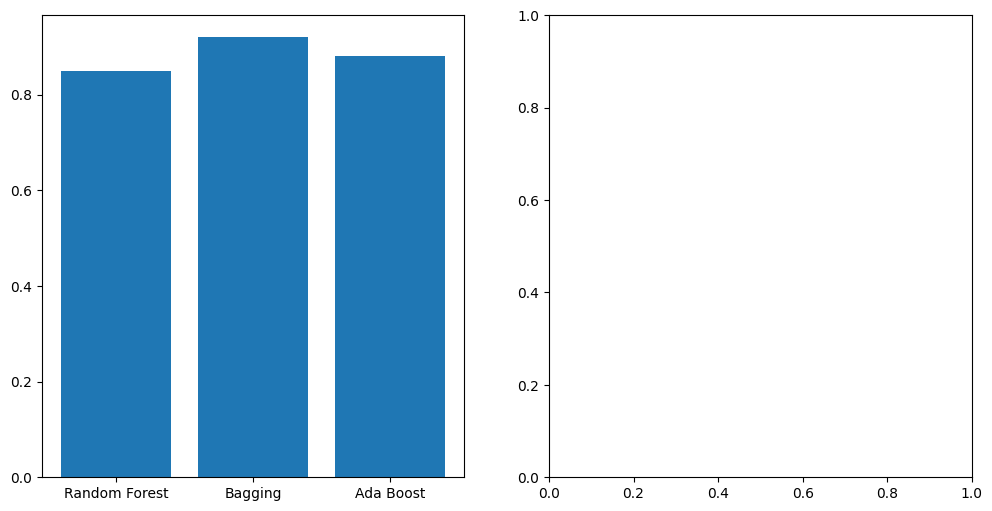

In [ ]:
import matplotlib.pyplot as plt

# Mock data for demonstration (replace this with your actual data)
trainAcc = [0.85, 0.92, 0.88]  # Example training accuracies for each method
methods = ['Random Forest', 'Bagging', 'Ada Boost']

# Check if trainAcc is not empty and has the correct length
if not trainAcc or len(trainAcc) != len(methods):
    print("Error: trainAcc is empty or has a different length than methods.")
else:
    # Proceed with plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.bar([1.5, 2.5, 3.5], trainAcc)
    ax1.set_xticks([1.5, 2.5, 3.5])
    ax1.set_xticklabels(methods)

plt.show()

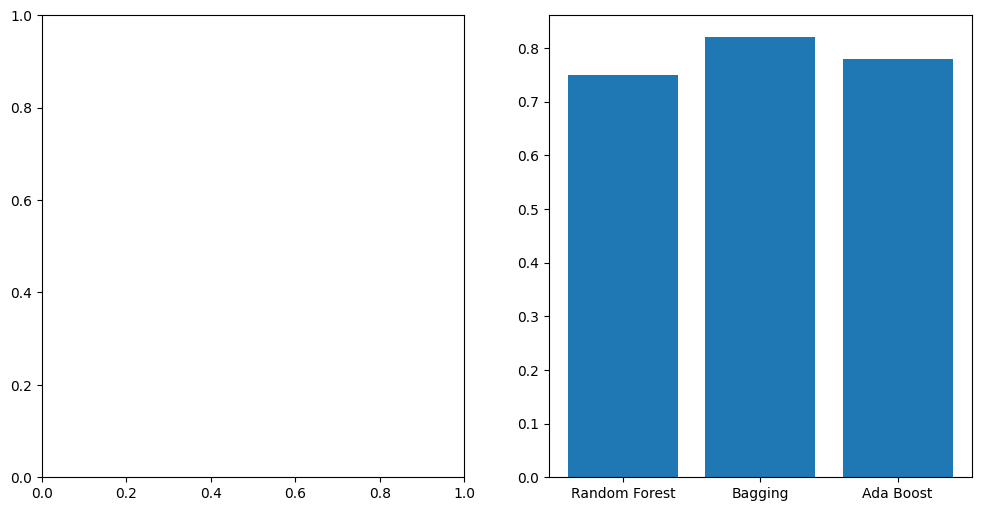

In [ ]:
import matplotlib.pyplot as plt

# Mock data for demonstration (replace this with your actual data)
testAcc = [0.75, 0.82, 0.78]  # Example testing accuracies for each method
methods = ['Random Forest', 'Bagging', 'Ada Boost']

# Check if testAcc is not empty and has the correct length
if not testAcc or len(testAcc) != len(methods):
    print("Error: testAcc is empty or has a different length than methods.")
else:
    # Proceed with plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax2.bar([1.5, 2.5, 3.5], testAcc)
    ax2.set_xticks([1.5, 2.5, 3.5])
    ax2.set_xticklabels(methods)

plt.show()

<ipython-input-47-548d11b4b721>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(methods)


[Text(1.5, 0, 'Random Forest'),
 Text(2.5, 0, 'Bagging'),
 Text(3.5, 0, 'Ada Boost')]

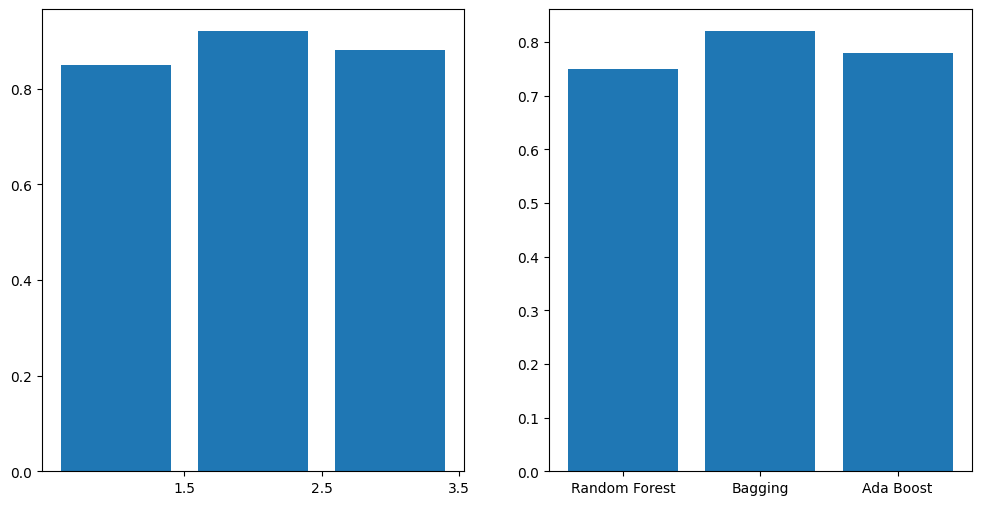

In [ ]:
import matplotlib.pyplot as plt
methods = ['Random Forest', 'Bagging', 'Ada Boost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1,2,3], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5],testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)